In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('./../data/2.01.+Admittance.csv')

In [3]:
data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [4]:
data['Admitted'] = data['Admitted'].map({'Yes': 1, 'No': 0})
data.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


In [5]:
y = data['Admitted']
x1 = data['SAT']

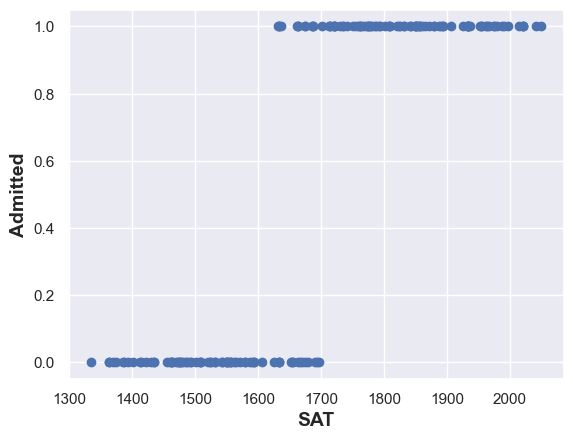

In [6]:
plt.scatter(x1, y)
plt.xlabel('SAT', fontdict={'size': 14, 'weight': 'bold'})
plt.ylabel('Admitted', fontdict={'size': 14, 'weight': 'bold'})
plt.show()

In [7]:
x = sm.add_constant(x1)
result = sm.Logit(y, x).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Fri, 17 Jan 2025   Pseudo R-squ.:                  0.7992
Time:                        07:42:16   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

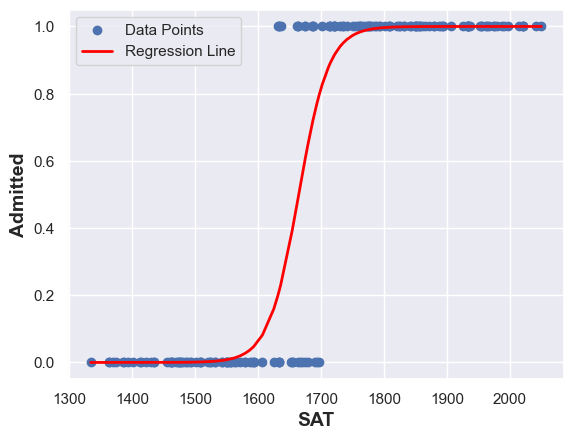

In [8]:
plt.scatter(x1, y, label='Data Points')
f = (np.exp(-69.9128+0.0420*x1)/(1+np.exp(-69.9128+0.0420*x1)))
fig = plt.plot(np.sort(x1), np.sort(f), lw=2, c='red', label='Regression Line')
plt.xlabel('SAT', fontdict={'size': 14, 'weight': 'bold'})
plt.ylabel('Admitted', fontdict={'size': 14, 'weight': 'bold'})
plt.legend()
plt.show()

In [9]:
result.predict().round(1).astype(int)

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0])

In [10]:
cm = result.pred_table()
cm

array([[67.,  7.],
       [ 7., 87.]])

In [11]:
accuracy = (cm[0,0]+cm[1,1])/cm.sum()
accuracy

0.9166666666666666